# Credit Card Application Approval Prediction

## 1. Set Environment & Libraries

In [1]:
# timer
import time

# Data manipulation libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling

# Feature engineering
import sklearn
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE

# Modelling
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Model evaluation
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import warnings
warnings.filterwarnings('ignore')

## 2. Load Data

In [5]:
# train dataset
train_data = pd.read_csv('/Users/songyarong/Workspace/5. Project/17.Credit Card Fraud Detection/Training.csv')

# test dataset 
test_data = pd.read_csv('/Users/songyarong/Workspace/5. Project/17.Credit Card Fraud Detection/Test.csv')

In [6]:
# head of the train_data
train_data.head()

,tot_balance,avg_bal_cards,credit_age,credit_age_good_account,credit_card_age,num_acc_30d_past_due_12_months,num_acc_30d_past_due_6_months,num_mortgage_currently_past_due,tot_amount_currently_past_due,num_inq_12_month,...,num_card_12_month,num_auto_ 36_month,uti_open_card,pct_over_50_uti,uti_max_credit_line,pct_card_over_50_uti,ind_XYZ,rep_income,rep_education,Def_ind
0,102956.1101,14819.05740,238,104,264,0,0,0,0.0,0,...,1,0,0.366737,0.342183,0.513934,0.550866,0,118266.32130,college,0
1,132758.7258,18951.93455,384,197,371,0,0,0,0.0,0,...,0,0,0.490809,0.540671,0.418016,NaN,0,89365.05765,college,0
2,124658.9174,15347.92969,277,110,288,0,0,0,0.0,0,...,0,0,0.359074,0.338560,0.341627,0.451417,0,201365.12130,college,0
3,133968.5369,14050.71334,375,224,343,0,0,0,0.0,2,...,1,0,0.700379,0.683589,0.542940,0.607843,0,191794.48550,college,0
4,143601.8017,14858.51527,374,155,278,0,0,0,0.0,0,...,0,0,0.647351,0.510812,0.632934,0.573680,0,161465.36790,graduate,0


In [7]:
# head of the test data
test_data.head()

,tot_balance,avg_bal_cards,credit_age,credit_age_good_account,credit_card_age,num_acc_30d_past_due_12_months,num_acc_30d_past_due_6_months,num_mortgage_currently_past_due,tot_amount_currently_past_due,num_inq_12_month,...,num_card_12_month,num_auto_ 36_month,uti_open_card,pct_over_50_uti,uti_max_credit_line,pct_card_over_50_uti,ind_XYZ,rep_income,rep_education,Def_ind
0,75061.45088,11051.42462,191,103,220,0,0,0,0.00000,0,...,0,0,0.417116,0.490809,0.400379,0.429427,1,200321.9635,high_school,0
1,89792.74848,13839.37518,140,145,152,1,0,0,0.00000,0,...,0,1,0.472116,0.505581,0.655517,0.501279,0,168452.9762,high_school,0
2,95928.23392,10437.19476,343,220,388,2,0,0,19530.99745,0,...,0,1,0.394099,0.551539,0.309663,0.482915,1,190633.9622,other,0
3,124957.43040,17413.10572,232,97,235,0,0,0,0.00000,0,...,2,1,0.492846,0.540109,0.590457,0.466224,1,106712.5622,high_school,0
4,75058.13462,12326.23680,236,165,280,0,0,0,0.00000,0,...,1,1,0.381452,0.344772,0.526555,0.345455,0,173172.1864,college,0


## 3. Data Exploratory Analysis

### 3.1 Imbalanced Label Column

In [9]:
# Distribution of the lable column/response variable 'Def_ind' in train_data
train_data['Def_ind'].value_counts()

0    18000
1     2000
Name: Def_ind, dtype: int64

In [10]:
# Distribution of the lable column/response variable 'Def_ind' in test_data
test_data['Def_ind'].value_counts()

0    4500
1     500
Name: Def_ind, dtype: int64

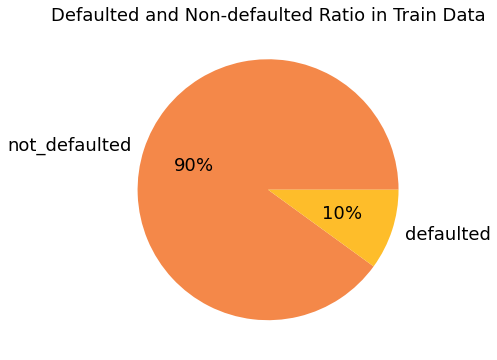

In [2]:
# plot the pie chart of the label column in train data
data = [18000, 2000]
labels = ['not_defaulted', 'defaulted']
f, axss = plt.subplots(1, 1, figsize = [6, 6])
colors = sns.color_palette('plasma')[4:6]
plt.pie(data, labels=labels, colors=colors, autopct='%.0f%%',textprops={'fontsize': 18})
plt.title('Defaulted and Non-defaulted Ratio in Train Data', fontsize = 18)
plt.show()

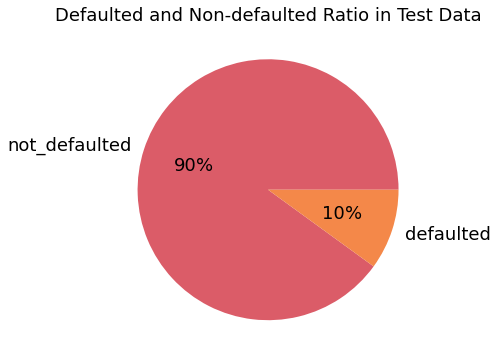

In [3]:
# plot the pie chart of the label column in test data
data = [4500, 500]
labels = ['not_defaulted', 'defaulted']
f, axss = plt.subplots(1, 1, figsize = [6, 6])
colors = sns.color_palette('plasma')[3:5]
plt.pie(data, labels=labels, colors=colors, autopct='%.0f%%', textprops={'fontsize': 18})
plt.title('Defaulted and Non-defaulted Ratio in Test Data', fontsize = 18)
plt.show()

The ratio of the positive data versus negative data is 1:9 for both train and test data. Therefore the data is imbalaned.

### 3.2 Understand the Raw Dataset

#### 3.2.1 Shape of the Dataset

In [8]:
print(train_data.shape)
print(test_data.shape)

(20000, 21)
(5000, 21)


#### 3.2.2 Data info

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   tot_balance                      20000 non-null  float64
 1   avg_bal_cards                    20000 non-null  float64
 2   credit_age                       20000 non-null  int64  
 3   credit_age_good_account          20000 non-null  int64  
 4   credit_card_age                  20000 non-null  int64  
 5   num_acc_30d_past_due_12_months   20000 non-null  int64  
 6   num_acc_30d_past_due_6_months    20000 non-null  int64  
 7   num_mortgage_currently_past_due  20000 non-null  int64  
 8   tot_amount_currently_past_due    20000 non-null  float64
 9   num_inq_12_month                 20000 non-null  int64  
 10  num_card_inq_24_month            20000 non-null  int64  
 11  num_card_12_month                20000 non-null  int64  
 12  num_auto_ 36_month

In [10]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   tot_balance                      5000 non-null   float64
 1   avg_bal_cards                    5000 non-null   float64
 2   credit_age                       5000 non-null   int64  
 3   credit_age_good_account          5000 non-null   int64  
 4   credit_card_age                  5000 non-null   int64  
 5   num_acc_30d_past_due_12_months   5000 non-null   int64  
 6   num_acc_30d_past_due_6_months    5000 non-null   int64  
 7   num_mortgage_currently_past_due  5000 non-null   int64  
 8   tot_amount_currently_past_due    5000 non-null   float64
 9   num_inq_12_month                 5000 non-null   int64  
 10  num_card_inq_24_month            5000 non-null   int64  
 11  num_card_12_month                5000 non-null   int64  
 12  num_auto_ 36_month  

#### 3.2.3 Unique values

In [11]:
train_data.nunique()

tot_balance                        20000
avg_bal_cards                      19999
credit_age                           470
credit_age_good_account              262
credit_card_age                      419
num_acc_30d_past_due_12_months         6
num_acc_30d_past_due_6_months          3
num_mortgage_currently_past_due        2
tot_amount_currently_past_due       1402
num_inq_12_month                      10
num_card_inq_24_month                 19
num_card_12_month                      4
num_auto_ 36_month                     3
uti_open_card                      20000
pct_over_50_uti                    20000
uti_max_credit_line                20000
pct_card_over_50_uti               18042
ind_XYZ                                2
rep_income                         18440
rep_education                          4
Def_ind                                2
dtype: int64

In [12]:
test_data.nunique()

tot_balance                        5000
avg_bal_cards                      5000
credit_age                          423
credit_age_good_account             245
credit_card_age                     457
num_acc_30d_past_due_12_months        6
num_acc_30d_past_due_6_months         3
num_mortgage_currently_past_due       2
tot_amount_currently_past_due      1185
num_inq_12_month                     11
num_card_inq_24_month                18
num_card_12_month                     4
num_auto_ 36_month                    3
uti_open_card                      5000
pct_over_50_uti                    5000
uti_max_credit_line                5000
pct_card_over_50_uti               4511
ind_XYZ                               2
rep_income                         4590
rep_education                         4
Def_ind                               2
dtype: int64

#### 3.2.4 Missing Values
- pct_card_over_50_uti has 1958 missing values in train, 489 missing in test
- rep_income has 1559 missing values in train, 410 missing in test
- rep_education has 1 missing value in train, 4 missing in test

In [13]:
# train data missing value
train_data.isnull().sum()           

tot_balance                           0
avg_bal_cards                         0
credit_age                            0
credit_age_good_account               0
credit_card_age                       0
num_acc_30d_past_due_12_months        0
num_acc_30d_past_due_6_months         0
num_mortgage_currently_past_due       0
tot_amount_currently_past_due         0
num_inq_12_month                      0
num_card_inq_24_month                 0
num_card_12_month                     0
num_auto_ 36_month                    0
uti_open_card                         0
pct_over_50_uti                       0
uti_max_credit_line                   0
pct_card_over_50_uti               1958
ind_XYZ                               0
rep_income                         1559
rep_education                         1
Def_ind                               0
dtype: int64

In [14]:
# test data missing value
test_data.isnull().sum()

tot_balance                          0
avg_bal_cards                        0
credit_age                           0
credit_age_good_account              0
credit_card_age                      0
num_acc_30d_past_due_12_months       0
num_acc_30d_past_due_6_months        0
num_mortgage_currently_past_due      0
tot_amount_currently_past_due        0
num_inq_12_month                     0
num_card_inq_24_month                0
num_card_12_month                    0
num_auto_ 36_month                   0
uti_open_card                        0
pct_over_50_uti                      0
uti_max_credit_line                  0
pct_card_over_50_uti               489
ind_XYZ                              0
rep_income                         410
rep_education                        4
Def_ind                              0
dtype: int64

#### 3.2.5 Duplicated data

In [15]:
train_data.duplicated().sum()

0

In [16]:
test_data.duplicated().sum()

0

### 3.3 Data profiling

In [18]:
# pandas-profiling
# pandas_profiling.ProfileReport(train_data, title="Pandas Profiling Report", vars={"num": {"low_categorical_threshold": 0}})


Summary:
- 5 groups of highly correlated numerical features
- pct_card_over_50_uti has 1958 (9.8%) missing values
- rep_income has 1559 (7.8%) missing values
- 8 right-skewed numerical features
- 1) num_acc_30d_past_due_12_months has 17614 (88.1%) zeros;
- 2) num_acc_30d_past_due_6_months has 19429 (97.1%) zeros
- 3) num_mortgage_currently_past_due has 19400 (97.0%) zeros
- 4) tot_amount_currently_past_due has 18599 (93.0%) zeros
- 5) num_inq_12_month has 14043 (70.2%) zeros
- 6) num_card_inq_24_month has 13193 (66.0%) zeros
- 7) num_card_12_month has 14923 (74.6%) zeros
- 8) num_auto_ 36_month has 16766 (83.8%) zeros


### 3.4 Categorical Features
ind_XYZ, rep_education

In [255]:
# categorical features
cat_col = ['ind_XYZ', 'rep_education']

#### 3.4.1 Education 

In [256]:
# mean defaulted rate for different education levels
education_defaulted_rate_train = train_data.groupby('rep_education')['Def_ind'].mean()
education_defaulted_rate_test = test_data.groupby('rep_education')['Def_ind'].mean()

In [257]:
education_defaulted_rate_train = education_defaulted_rate_train.sort_values(ascending=False, inplace=False)
education_defaulted_rate_train

rep_education
high_school    0.115732
college        0.096976
graduate       0.081879
other          0.077465
Name: Def_ind, dtype: float64

In [258]:
education_defaulted_rate_test = education_defaulted_rate_test.sort_values(ascending=False, inplace=False)
education_defaulted_rate_test

rep_education
other          0.107011
high_school    0.102894
college        0.100779
graduate       0.043716
Name: Def_ind, dtype: float64

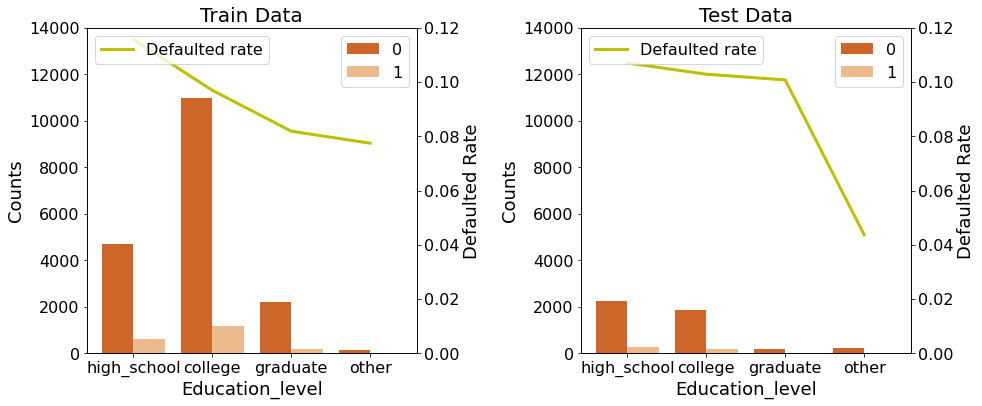

In [259]:
# plot the bar chart of the education and default countplot
f, axss = plt.subplots(1, 2, figsize = [14, 6])
axss_0 = axss[0].twinx() 
sns.countplot(palette='Oranges_r', x='rep_education', hue='Def_ind', data=train_data, ax=axss[0], order=['high_school','college', 'graduate', 'other'])
axss_0.plot(education_defaulted_rate_train, linewidth=3, color='y', label='Defaulted rate')
axss[0].set_title("Train Data", fontsize=20)
axss[0].set_xlabel("Education_level", fontsize=18)
axss[0].set_ylabel("Counts", fontsize=18)
axss_0.set_ylabel('Defaulted Rate', fontsize=18)
axss[0].tick_params(axis='both', labelsize= 16)
axss_0.tick_params(axis='both', labelsize= 16)
axss[0].set(ylim=(0,14000))
axss_0.set(ylim=(0,0.12))
axss[0].legend(fontsize=16)
axss_0.legend(fontsize=16, loc='upper left')


axss_1 = axss[1].twinx() 
sns.countplot(palette='Oranges_r', x='rep_education', hue='Def_ind', data=test_data, ax=axss[1], order=['high_school','college', 'graduate', 'other'])
axss_1.plot(education_defaulted_rate_test, linewidth=3, color='y', label='Defaulted rate')
axss[1].set_title("Test Data", fontsize=20)
axss[1].set_xlabel("Education_level", fontsize=18)
axss[1].set_ylabel("Counts", fontsize=18)
axss_1.set_ylabel('Defaulted Rate', fontsize=18)
axss[1].tick_params(axis='both', labelsize= 16)
axss_1.tick_params(axis='both', labelsize= 16)
axss[1].set(ylim=(0,14000))
axss_1.set(ylim=(0,0.12))
axss[1].legend(fontsize=16)
axss_1.legend(fontsize=16, loc='upper left')


f.tight_layout(pad=2)

In [260]:
train_data['rep_education'].value_counts()

college        12137
high_school     5314
graduate        2406
other            142
Name: rep_education, dtype: int64

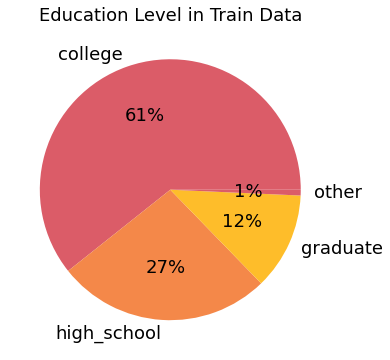

In [261]:
# plot the pie chart of the education level
data = [12137, 5314, 2406, 142]
labels = ['college', 'high_school', 'graduate', 'other']
f, axss = plt.subplots(1, 1, figsize = [6, 6])
colors = sns.color_palette('plasma')[3:7]
plt.pie(data, labels=labels, colors=colors, autopct='%.0f%%', textprops={'fontsize': 18})
plt.title('Education Level in Train Data', fontsize = 18)
plt.show()

In [262]:
test_data['rep_education'].value_counts()

high_school    2488
college        2054
other           271
graduate        183
Name: rep_education, dtype: int64

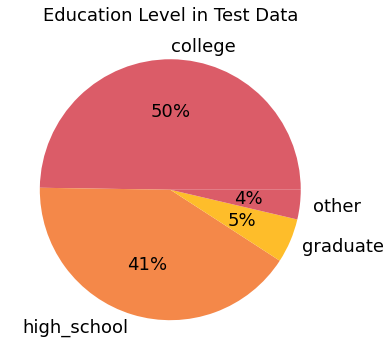

In [263]:
# plot the pie chart of the education level
data = [2488, 2054, 275, 183]
labels = ['college', 'high_school', 'graduate', 'other']
f, axss = plt.subplots(1, 1, figsize = [6, 6])
colors = sns.color_palette('plasma')[3:7]
plt.pie(data, labels=labels, colors=colors, autopct='%.0f%%', textprops={'fontsize': 18})
plt.title('Education Level in Test Data', fontsize = 18)
plt.show()

In [264]:
train_data[['rep_education', 'Def_ind']].value_counts()

rep_education  Def_ind
college        0          10960
high_school    0           4699
graduate       0           2209
college        1           1177
high_school    1            615
graduate       1            197
other          0            131
               1             11
dtype: int64

#### 3.4.2 Account 

In [265]:
# mean defaulted rate for users having some accounts or not
account_defaulted_rate_train = train_data.groupby('ind_XYZ')['Def_ind'].mean()
account_defaulted_rate_test = test_data.groupby('ind_XYZ')['Def_ind'].mean()

In [266]:
account_defaulted_rate_train

ind_XYZ
0    0.1074
1    0.0778
Name: Def_ind, dtype: float64

In [267]:
account_defaulted_rate_test

ind_XYZ
0    0.108
1    0.076
Name: Def_ind, dtype: float64

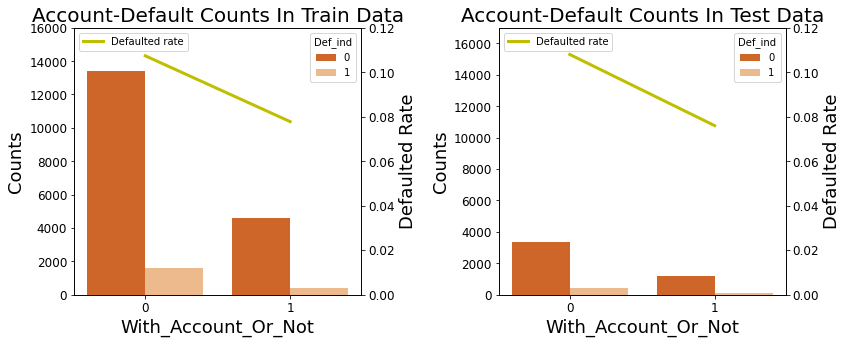

In [268]:
# plot the bar chart of the account and default countplot
f, axss = plt.subplots(1, 2, figsize = [12, 5])
axss_0 = axss[0].twinx() 
sns.countplot(palette='Oranges_r', x='ind_XYZ', hue='Def_ind', data=train_data, ax=axss[0])
axss_0.plot(account_defaulted_rate_train, linewidth=3, color='y', label='Defaulted rate')
axss[0].set_title("Account-Default Counts In Train Data", fontsize=20)
axss[0].set_xlabel("With_Account_Or_Not", fontsize=18)
axss[0].set_ylabel("Counts", fontsize=18)
axss_0.set_ylabel('Defaulted Rate', fontsize=18)
axss[0].tick_params(axis='both', labelsize= 12)
axss_0.tick_params(axis='both', labelsize= 12)
axss[0].set(ylim=(0,16000))
axss_0.set(ylim=(0,0.12))
legend = plt.legend()
plt.legend(loc='upper left')

axss_1 = axss[1].twinx() 
sns.countplot(palette='Oranges_r', x='ind_XYZ', hue='Def_ind', data=test_data, ax=axss[1])
axss_1.plot(account_defaulted_rate_test, linewidth=3, color='y', label='Defaulted rate')
axss[1].set_title("Account-Default Counts In Test Data", fontsize=20)
axss[1].set_xlabel("With_Account_Or_Not", fontsize=18)
axss[1].set_ylabel("Counts", fontsize=18)
axss_1.set_ylabel('Defaulted Rate', fontsize=18)
axss[1].tick_params(axis='both', labelsize= 12)
axss_1.tick_params(axis='both', labelsize= 12)
axss[1].set(ylim=(0,17000))
axss_1.set(ylim=(0,0.12))
legend = plt.legend()
frame = legend.get_frame()
plt.legend(loc='upper left')

f.tight_layout(pad=1.5)

In [269]:
train_data['ind_XYZ'].value_counts()

0    15000
1     5000
Name: ind_XYZ, dtype: int64

In [270]:
train_data[['ind_XYZ', 'Def_ind']].value_counts()

ind_XYZ  Def_ind
0        0          13389
1        0           4611
0        1           1611
1        1            389
dtype: int64

### 3.5 Numerical Features
- 18 numerical features
- 7 discrete; 11 cotinuous

In [271]:
# statistical description of numerical features
to_drop = ['ind_XYZ', 'rep_education', 'Def_ind']
X_num = train_data.drop(to_drop, axis=1)
X_num.shape

(20000, 18)

#### 3.5.1 Statistical description of numerical features

In [272]:
X_num.describe()

,tot_balance,avg_bal_cards,credit_age,credit_age_good_account,credit_card_age,num_acc_30d_past_due_12_months,num_acc_30d_past_due_6_months,num_mortgage_currently_past_due,tot_amount_currently_past_due,num_inq_12_month,num_card_inq_24_month,num_card_12_month,num_auto_ 36_month,uti_open_card,pct_over_50_uti,uti_max_credit_line,pct_card_over_50_uti,rep_income
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,18042.000000,18441.000000
mean,107439.032714,12230.735330,280.710050,146.100300,285.12085,0.156550,0.029700,0.030000,352.496791,0.616050,1.053050,0.272950,0.164150,0.490867,0.484157,0.465007,0.550964,166373.900129
std,22365.573172,3060.432745,73.238059,38.603134,64.25718,0.469524,0.176407,0.170591,1784.459199,1.158533,2.035766,0.487094,0.376977,0.129604,0.122891,0.130913,0.128403,33444.974846
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20000.000000
25%,92212.563363,10151.128043,231.000000,120.000000,242.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.403926,0.401141,0.377850,0.464195,143504.239600
50%,107711.034250,12238.862545,280.000000,146.000000,285.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.490365,0.485525,0.464847,0.551765,166462.899700
75%,122751.428100,14286.417122,330.000000,172.000000,330.00000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.578311,0.567996,0.553581,0.638316,188903.520800
max,200000.000000,25000.000000,560.000000,300.000000,550.00000,5.000000,2.000000,1.000000,35000.000000,10.000000,18.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,300000.000000


#### 3.5.2 Distribution of the discrete numerical features

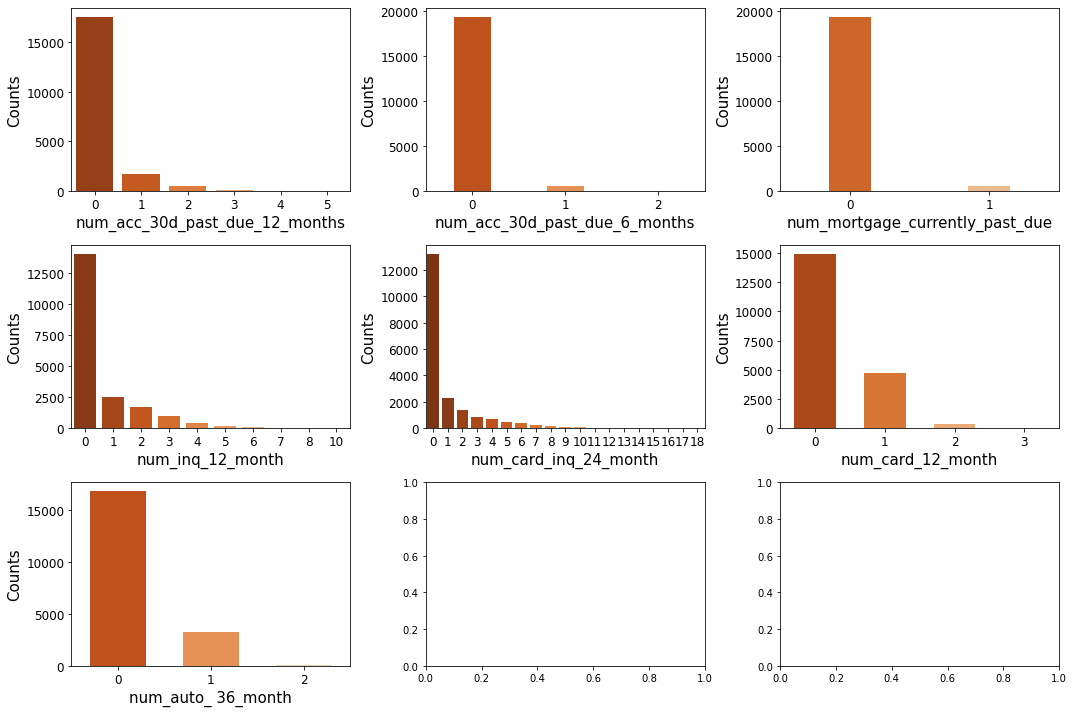

In [273]:
# countplot of 7 numerical features
fig,axes=plt.subplots(3,3,figsize=[15, 10])
sns.countplot(palette='Oranges_r', x='num_acc_30d_past_due_12_months', data=train_data, ax=axes[0][0])
axes[0][0].set_xlabel("num_acc_30d_past_due_12_months", fontsize=15)
axes[0][0].set_ylabel("Counts", fontsize=15)
axes[0][0].tick_params(axis='both', labelsize= 12)

sns.countplot(palette='Oranges_r', x='num_acc_30d_past_due_6_months', data=train_data, width=0.4, ax=axes[0][1])
axes[0][1].set_xlabel("num_acc_30d_past_due_6_months", fontsize=15)
axes[0][1].set_ylabel("Counts", fontsize=15)
axes[0][1].tick_params(axis='both', labelsize= 12)

sns.countplot(palette='Oranges_r', x='num_mortgage_currently_past_due', data=train_data, width=0.3, label = 'num_mortgage_currently_past_due', ax=axes[0][2])
axes[0][2].set_xlabel("num_mortgage_currently_past_due", fontsize=15)
axes[0][2].set_ylabel("Counts", fontsize=15)
axes[0][2].tick_params(axis='both', labelsize= 12)

sns.countplot(palette='Oranges_r', x='num_inq_12_month', data=train_data, ax=axes[1][0])
axes[1][0].set_xlabel("num_inq_12_month", fontsize=15)
axes[1][0].set_ylabel("Counts", fontsize=15)
axes[1][0].tick_params(axis='both', labelsize= 12)

sns.countplot(palette='Oranges_r', x='num_card_inq_24_month', data=train_data,  ax=axes[1][1])
axes[1][1].set_xlabel("num_card_inq_24_month", fontsize=15)
axes[1][1].set_ylabel("Counts", fontsize=15)
axes[1][1].tick_params(axis='both', labelsize= 12)

sns.countplot(palette='Oranges_r', x='num_card_12_month', data=train_data, width=0.6, label = 'num_card_12_month', ax=axes[1][2])
axes[1][2].set_xlabel("num_card_12_month", fontsize=15)
axes[1][2].set_ylabel("Counts", fontsize=15)
axes[1][2].tick_params(axis='both', labelsize= 12)

sns.countplot(palette='Oranges_r', x='num_auto_ 36_month', data=train_data, width=0.6, label = 'num_auto_ 36_month', ax=axes[2][0])
axes[2][0].set_xlabel("num_auto_ 36_month", fontsize=15)
axes[2][0].set_ylabel("Counts", fontsize=15)
axes[2][0].tick_params(axis='both', labelsize= 12)

fig.tight_layout(pad=1)

#### 3.5.3 Defaulted rate for the discrete numerical features

In [274]:
# defaulted rate for 7 numerical features
num_acc_30d_past_due_12_months_defaulted_rate = train_data.groupby('num_acc_30d_past_due_12_months')['Def_ind'].mean()
num_acc_30d_past_due_6_months_defaulted_rate = train_data.groupby('num_acc_30d_past_due_6_months')['Def_ind'].mean()
num_mortgage_currently_past_due_defaulted_rate = train_data.groupby('num_mortgage_currently_past_due')['Def_ind'].mean()
num_inq_12_month_defaulted_rate = train_data.groupby('num_inq_12_month')['Def_ind'].mean()
num_card_inq_24_month_defaulted_rate = train_data.groupby('num_card_inq_24_month')['Def_ind'].mean()
num_card_12_month_defaulted_rate = train_data.groupby('num_card_12_month')['Def_ind'].mean()
num_auto_36_month_defaulted_rate = train_data.groupby('num_auto_ 36_month')['Def_ind'].mean()  

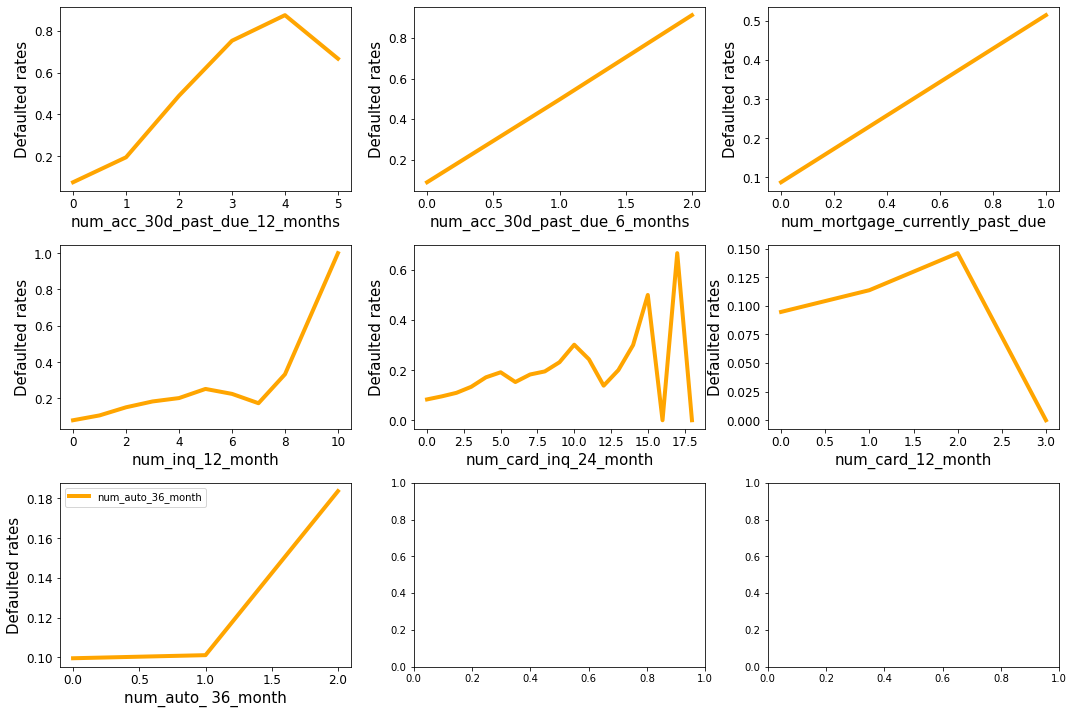

In [275]:
# line plot of the defaulted rates for each of the 7 numerical features
fig,axes=plt.subplots(3,3,figsize=[15, 10])
sns.lineplot(num_acc_30d_past_due_12_months_defaulted_rate,linewidth=4, color='Orange', ax=axes[0][0])
axes[0][0].set_xlabel("num_acc_30d_past_due_12_months", fontsize=15)
axes[0][0].set_ylabel("Defaulted rates", fontsize=15)
axes[0][0].tick_params(axis='both', labelsize= 12)

sns.lineplot(num_acc_30d_past_due_6_months_defaulted_rate,linewidth=4, color='Orange', ax=axes[0][1])
axes[0][1].set_xlabel("num_acc_30d_past_due_6_months", fontsize=15)
axes[0][1].set_ylabel("Defaulted rates", fontsize=15)
axes[0][1].tick_params(axis='both', labelsize= 12)

sns.lineplot(num_mortgage_currently_past_due_defaulted_rate,linewidth=4, color='Orange', ax=axes[0][2])
axes[0][2].set_xlabel("num_mortgage_currently_past_due", fontsize=15)
axes[0][2].set_ylabel("Defaulted rates", fontsize=15)
axes[0][2].tick_params(axis='both', labelsize= 12)

sns.lineplot(num_inq_12_month_defaulted_rate,linewidth=4, color='Orange', ax=axes[1][0])
axes[1][0].set_xlabel("num_inq_12_month", fontsize=15)
axes[1][0].set_ylabel("Defaulted rates", fontsize=15)
axes[1][0].tick_params(axis='both', labelsize= 12)

sns.lineplot(num_card_inq_24_month_defaulted_rate,linewidth=4, color='Orange', ax=axes[1][1])
axes[1][1].set_xlabel("num_card_inq_24_month", fontsize=15)
axes[1][1].set_ylabel("Defaulted rates", fontsize=15)
axes[1][1].tick_params(axis='both', labelsize= 12)

sns.lineplot(num_card_12_month_defaulted_rate,linewidth=4, color='Orange', ax=axes[1][2])
axes[1][2].set_xlabel("num_card_12_month", fontsize=15)
axes[1][2].set_ylabel("Defaulted rates", fontsize=15)
axes[1][2].tick_params(axis='both', labelsize= 12)

sns.lineplot(num_auto_36_month_defaulted_rate,linewidth=4, color='Orange', label = 'num_auto_36_month', ax=axes[2][0])
axes[2][0].set_xlabel("num_auto_ 36_month", fontsize=15)
axes[2][0].set_ylabel("Defaulted rates", fontsize=15)
axes[2][0].tick_params(axis='both', labelsize= 12)

fig.tight_layout(pad=1.0)

#### 3.5.4 Distribution of continous nuremical features

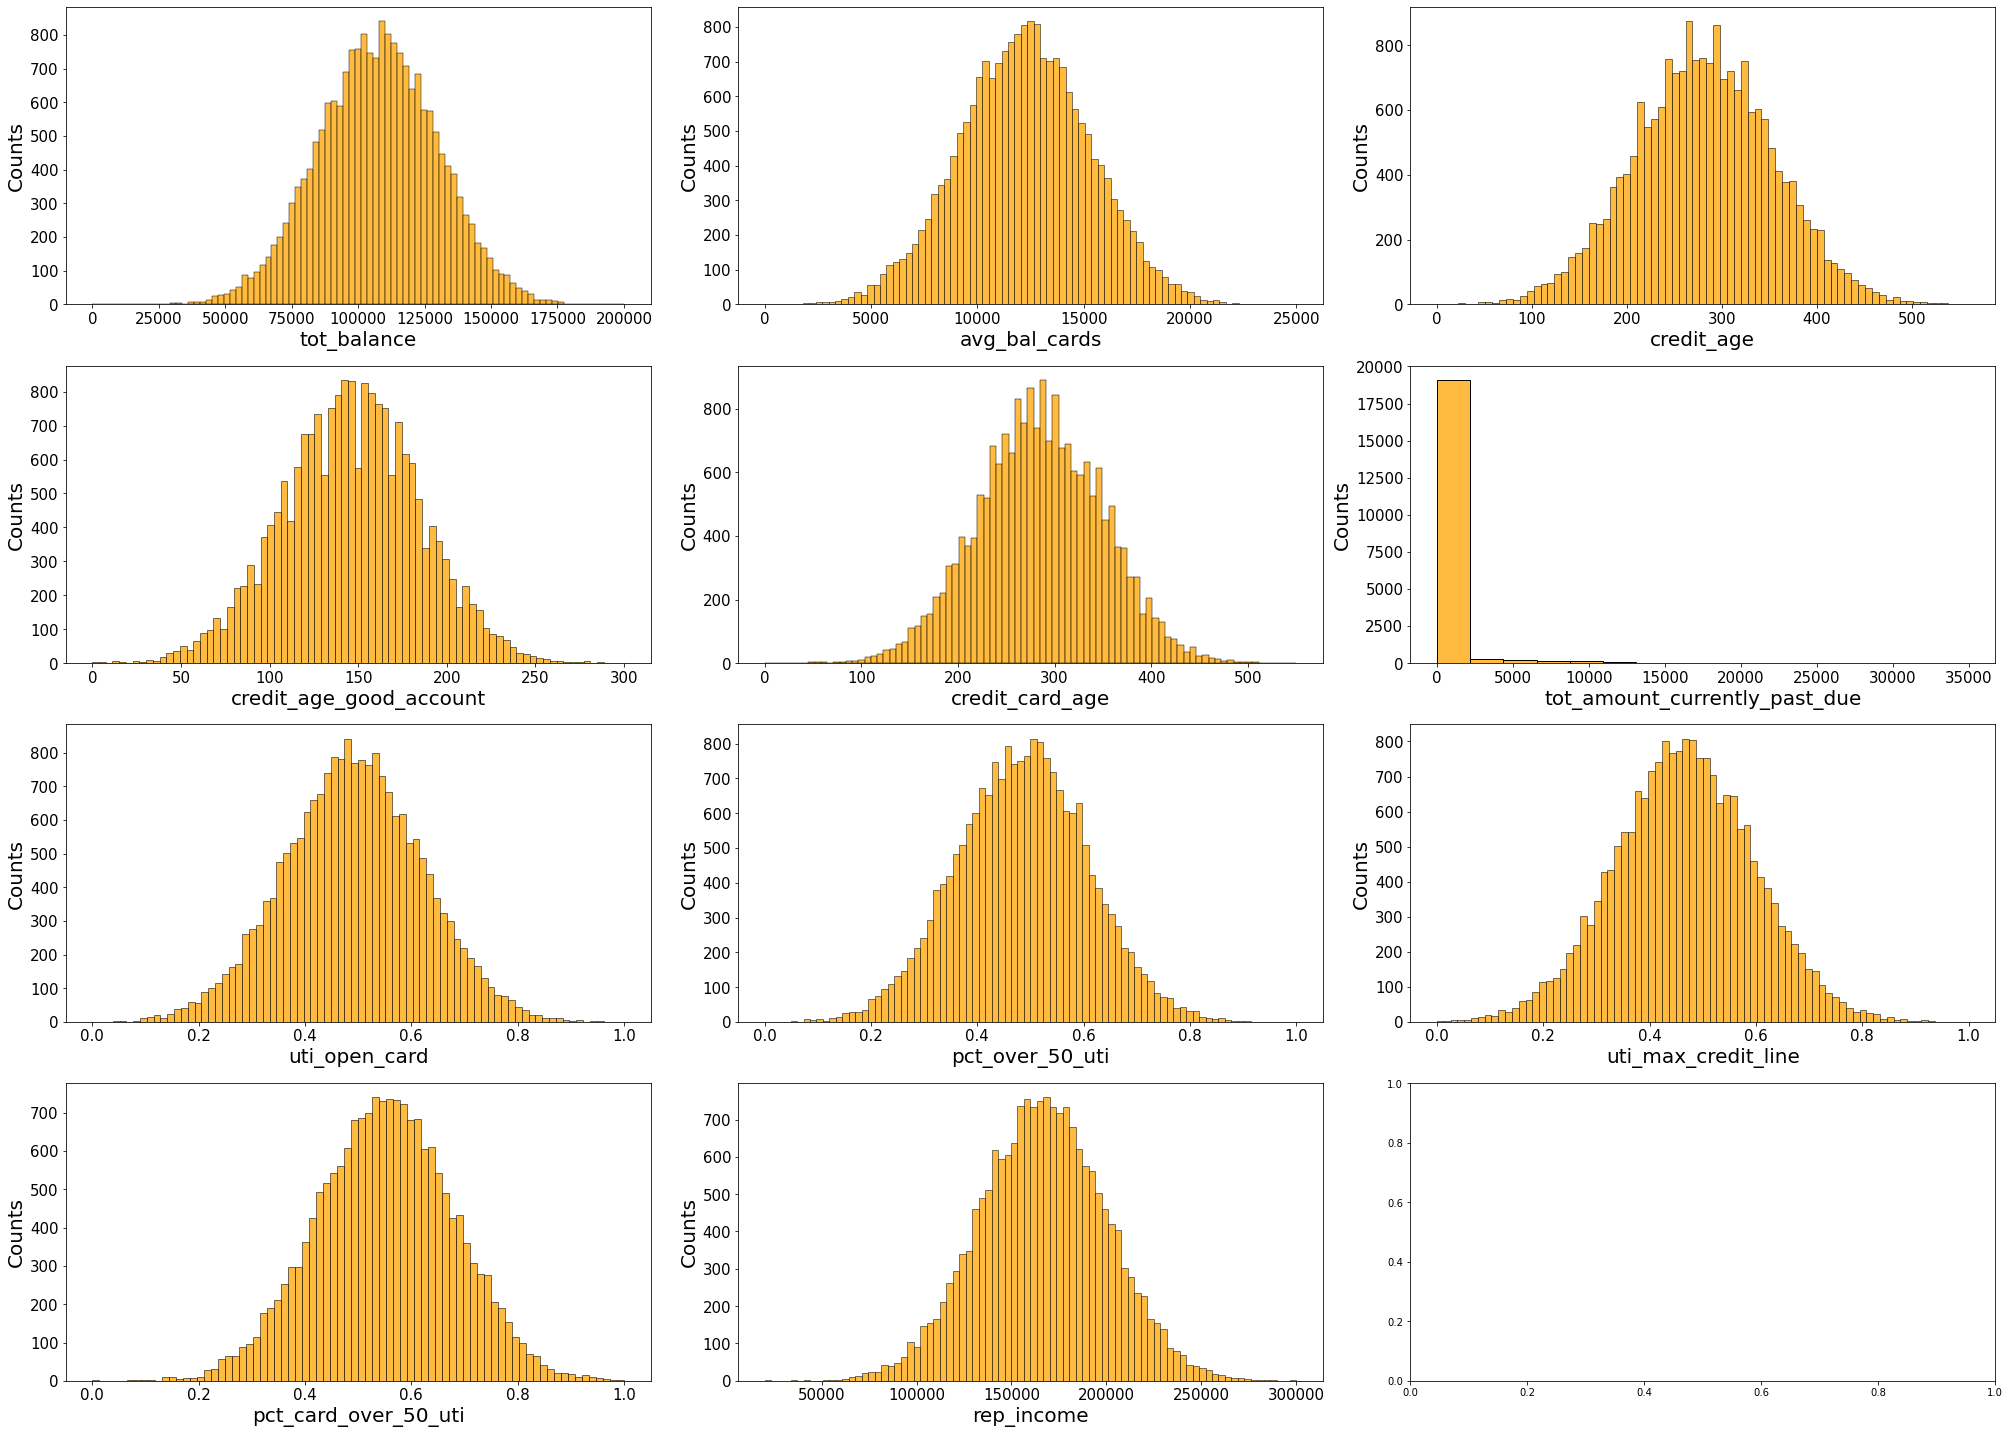

In [276]:
fig,axes=plt.subplots(4,3,figsize=[28, 20])
sns.histplot(train_data['tot_balance'], color='Orange', ax=axes[0][0])
axes[0][0].set_xlabel("tot_balance", fontsize=20)
axes[0][0].set_ylabel("Counts", fontsize=20)
axes[0][0].tick_params(axis='both', labelsize= 15)

sns.histplot(train_data['avg_bal_cards'], color='Orange', ax=axes[0][1])
axes[0][1].set_xlabel("avg_bal_cards", fontsize=20)
axes[0][1].set_ylabel("Counts", fontsize=20)
axes[0][1].tick_params(axis='both', labelsize= 15)

sns.histplot(train_data['credit_age'], color='Orange', ax=axes[0][2])
axes[0][2].set_xlabel("credit_age", fontsize=20)
axes[0][2].set_ylabel("Counts", fontsize=20)
axes[0][2].tick_params(axis='both', labelsize= 15)

sns.histplot(train_data['credit_age_good_account'], color='Orange', ax=axes[1][0])
axes[1][0].set_xlabel("credit_age_good_account", fontsize=20)
axes[1][0].set_ylabel("Counts", fontsize=20)
axes[1][0].tick_params(axis='both', labelsize= 15)

sns.histplot(train_data['credit_card_age'], color='Orange', ax=axes[1][1])
axes[1][1].set_xlabel("credit_card_age", fontsize=20)
axes[1][1].set_ylabel("Counts", fontsize=20)
axes[1][1].tick_params(axis='both', labelsize= 15)


sns.histplot(train_data['tot_amount_currently_past_due'], color='Orange', ax=axes[1][2])
axes[1][2].set_xlabel("tot_amount_currently_past_due", fontsize=20)
axes[1][2].set_ylabel("Counts", fontsize=20)
axes[1][2].tick_params(axis='both', labelsize= 15)


sns.histplot(train_data['uti_open_card'], color='Orange', ax=axes[2][0])
axes[2][0].set_xlabel("uti_open_card", fontsize=20)
axes[2][0].set_ylabel("Counts", fontsize=20)
axes[2][0].tick_params(axis='both', labelsize= 15)

sns.histplot(train_data['pct_over_50_uti'], color='Orange', ax=axes[2][1])
axes[2][1].set_xlabel("pct_over_50_uti", fontsize=20)
axes[2][1].set_ylabel("Counts", fontsize=20)
axes[2][1].tick_params(axis='both', labelsize= 15)

sns.histplot(train_data['uti_max_credit_line'], color='Orange', ax=axes[2][2])
axes[2][2].set_xlabel("uti_max_credit_line", fontsize=20)
axes[2][2].set_ylabel("Counts", fontsize=20)
axes[2][2].tick_params(axis='both', labelsize= 15)

sns.histplot(train_data['pct_card_over_50_uti'], color='Orange', ax=axes[3][0])
axes[3][0].set_xlabel("pct_card_over_50_uti", fontsize=20)
axes[3][0].set_ylabel("Counts", fontsize=20)
axes[3][0].tick_params(axis='both', labelsize= 15)

sns.histplot(train_data['rep_income'], color='Orange', ax=axes[3][1])
axes[3][1].set_xlabel("rep_income", fontsize=20)
axes[3][1].set_ylabel("Counts", fontsize=20)
axes[3][1].tick_params(axis='both', labelsize= 15)

fig.tight_layout(pad=1)

### 3.6 Feature Correlation

Text(0.5, 1.0, 'Numerical Feature Correlation')

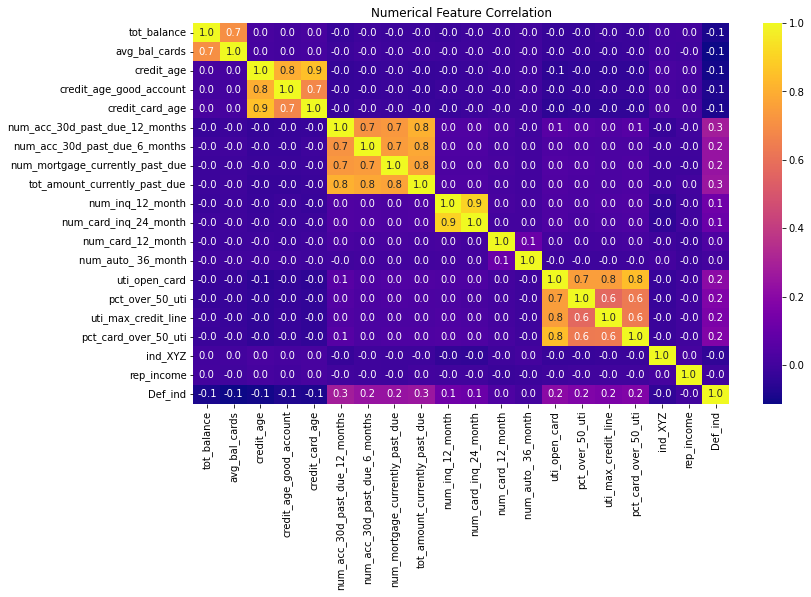

In [285]:
f, axss = plt.subplots(1, 1, figsize = [12, 7])
corr = train_data.corr()
sns.heatmap(corr, annot=True, fmt=".1f", cmap='plasma')
plt.title('Numerical Feature Correlation')

## 4. Feature Engineering

### 4.1 Missing values
- pct_card_over_50_uti has 1958 (9.8%) missing values in train, 489 missing in test
- rep_income has 1559 (7.8%) missing values in train, 410 missing in test
- rep_education has 1 missing value in train, 4 missing in test

#### pct_card_over_50_uti

In [35]:
# fillna using mean of 'pct_card_over_50_uti', which is normally distributed
train_data['pct_card_over_50_uti'] = train_data['pct_card_over_50_uti'].fillna(train_data['pct_card_over_50_uti'].mean())
test_data['pct_card_over_50_uti'] = test_data['pct_card_over_50_uti'].fillna(test_data['pct_card_over_50_uti'].mean())

#### rep_education

In [36]:
# fillna using 'other'
train_data['rep_education'] = train_data['rep_education'].fillna('other')
test_data['rep_education'] = test_data['rep_education'].fillna('other')

#### rep_income 

In [37]:
# fillna using mean of 'rep_income', which is normally distributed
train_data['rep_income'] = train_data['rep_income'].fillna(train_data['rep_income'].mean())
test_data['rep_income'] = test_data['rep_income'].fillna(test_data['rep_income'].mean())

### 4.2 Comparision between features

In [38]:
train_data.shape

(20000, 21)

In [39]:
X_num.describe()

,tot_balance,avg_bal_cards,credit_age,credit_age_good_account,credit_card_age,num_acc_30d_past_due_12_months,num_acc_30d_past_due_6_months,num_mortgage_currently_past_due,tot_amount_currently_past_due,num_inq_12_month,num_card_inq_24_month,num_card_12_month,num_auto_ 36_month,uti_open_card,pct_over_50_uti,uti_max_credit_line,pct_card_over_50_uti,rep_income
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,18042.000000,18441.000000
mean,107439.032714,12230.735330,280.710050,146.100300,285.12085,0.156550,0.029700,0.030000,352.496791,0.616050,1.053050,0.272950,0.164150,0.490867,0.484157,0.465007,0.550964,166373.900129
std,22365.573172,3060.432745,73.238059,38.603134,64.25718,0.469524,0.176407,0.170591,1784.459199,1.158533,2.035766,0.487094,0.376977,0.129604,0.122891,0.130913,0.128403,33444.974846
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20000.000000
25%,92212.563363,10151.128043,231.000000,120.000000,242.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.403926,0.401141,0.377850,0.464195,143504.239600
50%,107711.034250,12238.862545,280.000000,146.000000,285.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.490365,0.485525,0.464847,0.551765,166462.899700
75%,122751.428100,14286.417122,330.000000,172.000000,330.00000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.578311,0.567996,0.553581,0.638316,188903.520800
max,200000.000000,25000.000000,560.000000,300.000000,550.00000,5.000000,2.000000,1.000000,35000.000000,10.000000,18.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,300000.000000


#### 4.2.1 credit_age replacement
It is noted that some of the credit ages are smaller than credit_card_ages and credit_age_good_account.

#### train data

In [40]:
print(train_data[train_data['credit_age'] < train_data['credit_card_age']].shape)    # false 'credit_age'
print(train_data[train_data['credit_age'] == train_data['credit_card_age']].shape)
print(train_data[train_data['credit_age'] > train_data['credit_card_age']].shape)

(10809, 21)
(213, 21)
(8978, 21)


In [41]:
print(train_data[train_data['credit_age'] < train_data['credit_age_good_account']].shape)  # false 'credit_age'

(48, 21)


In [42]:
# replace the false 'credit_age' with the 'credit_card_age'
for i in range(train_data.shape[0]):
    if train_data.loc[i, 'credit_age'] < train_data.loc[i, 'credit_card_age']:
        train_data.loc[i, 'credit_age'] = train_data.loc[i, 'credit_card_age']

In [43]:
print(train_data[train_data['credit_age'] < train_data['credit_card_age']].shape)    # false 'credit-age'
print(train_data[train_data['credit_age'] == train_data['credit_card_age']].shape)
print(train_data[train_data['credit_age'] > train_data['credit_card_age']].shape)

(0, 21)
(11022, 21)
(8978, 21)


In [ ]:
print(train_data[train_data['credit_age'] < train_data['credit_age_good_account']].shape)  # false 'credit_age'

In [44]:
for i in range(train_data.shape[0]):
    if train_data.loc[i, 'credit_age'] < train_data.loc[i, 'credit_age_good_account']:
        train_data.loc[i, 'credit_age'] = train_data.loc[i, 'credit_age_good_account']

In [45]:
train_data[train_data['credit_age'] < train_data['credit_age_good_account']].shape

(0, 21)

#### test data

In [46]:
print(test_data[test_data['credit_age'] < test_data['credit_card_age']].shape)    # false 'credit_age'
print(test_data[test_data['credit_age'] == test_data['credit_card_age']].shape)
print(test_data[test_data['credit_age'] > test_data['credit_card_age']].shape)

(3336, 21)
(43, 21)
(1621, 21)


In [47]:
test_data[test_data['credit_age'] < test_data['credit_age_good_account']].shape 

(29, 21)

In [48]:
# replace the false 'credit_age' with the 'credit_card_age'
for i in range(test_data.shape[0]):
    if test_data.loc[i, 'credit_age'] < test_data.loc[i, 'credit_card_age']:
        test_data.loc[i, 'credit_age'] = test_data.loc[i, 'credit_card_age']

In [49]:
print(test_data[test_data['credit_age'] < test_data['credit_card_age']].shape)    # false 'credit_age'
print(test_data[test_data['credit_age'] == test_data['credit_card_age']].shape)
print(test_data[test_data['credit_age'] > test_data['credit_card_age']].shape)

(0, 21)
(3379, 21)
(1621, 21)


In [50]:
for i in range(test_data.shape[0]):
    if test_data.loc[i, 'credit_age'] < test_data.loc[i, 'credit_age_good_account']:
        test_data.loc[i, 'credit_age'] = test_data.loc[i, 'credit_age_good_account']

In [51]:
test_data[test_data['credit_age'] < test_data['credit_age_good_account']].shape 

(0, 21)

#### 4.2.2  num_acc_30d_past_due_12_months

In [52]:
print(train_data[train_data['num_acc_30d_past_due_12_months'] < train_data['num_acc_30d_past_due_6_months']].shape)
print(test_data[test_data['num_acc_30d_past_due_12_months'] < test_data['num_acc_30d_past_due_6_months']].shape)

(0, 21)
(5, 21)


In [53]:
for i in range(test_data.shape[0]):
    if test_data.loc[i, 'num_acc_30d_past_due_12_months'] < test_data.loc[i, 'num_acc_30d_past_due_6_months']:
        test_data.loc[i, 'num_acc_30d_past_due_12_months'] = test_data.loc[i, 'num_acc_30d_past_due_6_months']

In [54]:
print(test_data[test_data['num_acc_30d_past_due_12_months'] < test_data['num_acc_30d_past_due_6_months']].shape)

(0, 21)


#### 4.2.3 num_inq_12_month  & num_card_inq_24_month

#### train data

In [293]:
print(train_data[train_data['num_inq_12_month'] < train_data['num_card_12_month']].shape)
print(train_data[train_data['num_card_inq_24_month'] < train_data['num_card_12_month']].shape)

(3576, 21)
(3384, 21)


In [300]:
# replace the false 'num_inq_12_month'
for i in range(train_data.shape[0]):
    if train_data.loc[i, 'num_inq_12_month'] < train_data.loc[i, 'num_card_12_month']:
        train_data.loc[i, 'num_inq_12_month'] = train_data.loc[i, 'num_card_12_month']
        
    if train_data.loc[i, 'num_card_inq_24_month'] < train_data.loc[i, 'num_card_12_month']:
        train_data.loc[i, 'num_card_inq_24_month'] = train_data.loc[i, 'num_card_12_month']           

In [301]:
print(train_data[train_data['num_inq_12_month'] < train_data['num_card_12_month']].shape)
print(train_data[train_data['num_card_inq_24_month'] < train_data['num_card_12_month']].shape)

(0, 21)
(0, 21)


#### test data

In [303]:
print(test_data[test_data['num_inq_12_month'] < test_data['num_card_12_month']].shape)
print(test_data[test_data['num_card_inq_24_month'] < test_data['num_card_12_month']].shape)

(811, 21)
(744, 21)


In [304]:
# replace the false 'credit_age' with the 'credit_card_age'
for i in range(test_data.shape[0]):
    if test_data.loc[i, 'num_inq_12_month'] < test_data.loc[i, 'num_card_12_month']:
        test_data.loc[i, 'num_inq_12_month'] = test_data.loc[i, 'num_card_12_month']
        
    if test_data.loc[i, 'num_card_inq_24_month'] < test_data.loc[i, 'num_card_12_month']:
        test_data.loc[i, 'num_card_inq_24_month'] = test_data.loc[i, 'num_card_12_month']           

In [305]:
print(test_data[test_data['num_inq_12_month'] < test_data['num_card_12_month']].shape)
print(test_data[test_data['num_card_inq_24_month'] < test_data['num_card_12_month']].shape)

(0, 21)
(0, 21)


#### 4.2.4 tot_balance & avg_bal_cards

In [306]:
print(train_data[train_data['tot_balance'] < train_data['avg_bal_cards']].shape)

(1, 21)


### 4.3 Numerical feature scaling

In [55]:
# MinMaxScaler
scaler = preprocessing.MinMaxScaler()
all_columns = train_data.columns
num_col = [col for col in all_columns if col not in to_drop]
X_train = train_data.copy()
scaler.fit(X_train[num_col])
X_train[num_col] = scaler.transform(X_train[num_col])

In [278]:
all_columns.shape

(21,)

In [280]:
len(num_col)

18

In [281]:
X_train.head()

,tot_balance,avg_bal_cards,credit_age,credit_age_good_account,credit_card_age,num_acc_30d_past_due_12_months,num_acc_30d_past_due_6_months,num_mortgage_currently_past_due,tot_amount_currently_past_due,num_inq_12_month,...,pct_over_50_uti,uti_max_credit_line,pct_card_over_50_uti,rep_income,ind_XYZ_0,ind_XYZ_1,rep_education_college,rep_education_graduate,rep_education_high_school,rep_education_other
0,0.514781,0.592762,0.419608,0.346667,0.480000,0.0,0.0,0.0,0.0,0.0,...,0.342183,0.513934,0.550866,0.350951,1,0,1,0,0,0
1,0.663794,0.758077,0.654902,0.656667,0.674545,0.0,0.0,0.0,0.0,0.0,...,0.540671,0.418016,0.550964,0.247732,1,0,1,0,0,0
2,0.623295,0.613917,0.466667,0.366667,0.523636,0.0,0.0,0.0,0.0,0.0,...,0.338560,0.341627,0.451417,0.647733,1,0,1,0,0,0
3,0.669843,0.562029,0.637255,0.746667,0.623636,0.0,0.0,0.0,0.0,0.2,...,0.683589,0.542940,0.607843,0.613552,1,0,1,0,0,0
4,0.718009,0.594341,0.635294,0.516667,0.505455,0.0,0.0,0.0,0.0,0.0,...,0.510812,0.632934,0.573680,0.505233,1,0,0,1,0,0


In [56]:
# test data scaling
X_test = test_data.copy()
X_test[num_col] = scaler.transform(X_test[num_col])

### 4.4 Categorical feature encoding

In [57]:
X_train = pd.get_dummies(X_train, columns=cat_col)  # 5row * 25col
X_train.shape

(20000, 25)

In [58]:
X_test = pd.get_dummies(X_test, columns=cat_col)   # 5row * 25col
X_test.shape

(5000, 25)

In [59]:
X_train.head()

,tot_balance,avg_bal_cards,credit_age,credit_age_good_account,credit_card_age,num_acc_30d_past_due_12_months,num_acc_30d_past_due_6_months,num_mortgage_currently_past_due,tot_amount_currently_past_due,num_inq_12_month,...,uti_max_credit_line,pct_card_over_50_uti,rep_income,Def_ind,ind_XYZ_0,ind_XYZ_1,rep_education_college,rep_education_graduate,rep_education_high_school,rep_education_other
0,0.514781,0.592762,0.419608,0.346667,0.480000,0.0,0.0,0.0,0.0,0.0,...,0.513934,0.550866,0.350951,0,1,0,1,0,0,0
1,0.663794,0.758077,0.654902,0.656667,0.674545,0.0,0.0,0.0,0.0,0.0,...,0.418016,0.550964,0.247732,0,1,0,1,0,0,0
2,0.623295,0.613917,0.466667,0.366667,0.523636,0.0,0.0,0.0,0.0,0.0,...,0.341627,0.451417,0.647733,0,1,0,1,0,0,0
3,0.669843,0.562029,0.637255,0.746667,0.623636,0.0,0.0,0.0,0.0,0.2,...,0.542940,0.607843,0.613552,0,1,0,1,0,0,0
4,0.718009,0.594341,0.635294,0.516667,0.505455,0.0,0.0,0.0,0.0,0.0,...,0.632934,0.573680,0.505233,0,1,0,0,1,0,0


### 4.4 Data preparation

In [60]:
# response variable
y = X_train['Def_ind']

# predictors
X_train = X_train.drop('Def_ind', axis=1)

In [61]:
X_train.shape

(20000, 24)

In [62]:
y_test = X_test['Def_ind']
X_test = X_test.drop('Def_ind', axis=1)

In [63]:
X_test.shape

(5000, 24)

## 5. Modelling 

### 5.1 Model selection with Cross Validation (no hyperparameter tuning) on Original Data

In [64]:
classifiers = [
    LogisticRegression(solver='lbfgs', max_iter=1000),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    ]

for classifier in classifiers:
    %time
    scores = cross_val_score(classifier, X_train, y, cv=5, scoring='f1')
    print(classifier, 'F1 score is %.3f (%.3g)' % (np.mean(scores), np.std(scores)))
    print('========')

CPU times: user 1e+03 ns, sys: 1 µs, total: 2 µs
Wall time: 2.86 µs
LogisticRegression(max_iter=1000) F1 score is 0.259 (0.0102)
CPU times: user 8 µs, sys: 26 µs, total: 34 µs
Wall time: 8.82 µs
DecisionTreeClassifier() F1 score is 0.330 (0.0091)
CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 3.81 µs
RandomForestClassifier() F1 score is 0.356 (0.0107)
CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 2.86 µs
GradientBoostingClassifier() F1 score is 0.420 (0.0121)


GradientBoosting performed better with high F1 score, i.e., 0.419, and shortest time 2.62s.

### 5.2 SMOTE sampling and modelling

In [65]:
y.value_counts()

0    18000
1     2000
Name: Def_ind, dtype: int64

In [66]:
smote = SMOTE(random_state=12)
X_train_sm, y_sm = smote.fit_sample(X_train, y)
y_sm.value_counts()

0    18000
1    18000
Name: Def_ind, dtype: int64

In [67]:
classifiers = [
    LogisticRegression(solver='lbfgs', max_iter=1000),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    ]

for classifier in classifiers:
    %time
    scores = cross_val_score(classifier, X_train_sm, y_sm, cv=5, scoring='f1')
    print(classifier, 'F1 score is %.3f (%.3g)' % (np.mean(scores), np.std(scores)))
    print('========')

CPU times: user 3 µs, sys: 6 µs, total: 9 µs
Wall time: 1.91 µs
LogisticRegression(max_iter=1000) F1 score is 0.716 (0.00202)
CPU times: user 7 µs, sys: 30 µs, total: 37 µs
Wall time: 8.82 µs
DecisionTreeClassifier() F1 score is 0.854 (0.0162)
CPU times: user 1e+03 ns, sys: 1e+03 ns, total: 2 µs
Wall time: 2.15 µs
RandomForestClassifier() F1 score is 0.938 (0.0135)
CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 2.15 µs
GradientBoostingClassifier() F1 score is 0.838 (0.0344)


After SMOTE, RandomForestClassifier performed the best with high F1 score, i.e., 0.938, and shortest time 2.15s.

### 5.3 Parameter tuning by GridSearchCV

#### 5.3.1 UDF: Helper function for printing out grid search and test_data prediction results

In [68]:
# Helper function for printing out grid search results
def grid_search_wrapper(model, parameters, refit_score='f1_score'):
    """
    fits a GridSearchCV classifier using refit_score for optimization(refit on the best model according to refit_score)
    prints classifier performance metrics
    """

    grid_search = GridSearchCV(model, parameters, refit=refit_score,
                           cv=4, return_train_score=True)
    grid_search.fit(X_train_sm, y_sm)

    print('Best params for {}'.format(refit_score))
    print(grid_search.best_params_)

    # make the predictions
    y_pred = grid_search.predict(X_test)
    y_prob = grid_search.predict_proba(X_test)[:, 1]
    
    # confusion matrix on the test data.
    print('\nConfusion matrix optimized for {} on the test data:'.format(refit_score))
    cm = confusion_matrix(y_test, y_pred)
    cmDF = pd.DataFrame(cm, columns=['pred_0', 'pred_1'], index=['true_0', 'true_1'])
    print(cmDF)
    
    # scores
    print("roc_auc_score is: ", roc_auc_score(y_test, y_prob))
    print("f1_score is: ", f1_score(y_test, y_pred))
    print("Accuracy: ", accuracy_score(y_test, y_pred))
    print("recall = ", recall_score(y_test, y_pred))
    print("precision = ", precision_score(y_test, y_pred))

    return grid_search

#### 5.3.2 LogisticRegression optimization 

In [69]:
parameters = {'penalty':('l1', 'l2'), 'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000] }
LR = LogisticRegression(random_state=0, max_iter=1000)
GRID_LR = grid_search_wrapper(LR, parameters, refit_score='f1_score')

Best params for f1_score
{'C': 1, 'penalty': 'l2'}

Confusion matrix optimized for f1_score on the test data:
        pred_0  pred_1
true_0    3098    1402
true_1     126     374
roc_auc_score is:  0.7902582222222223
f1_score is:  0.328646748681898
Accuracy:  0.6944
recall =  0.748
precision =  0.21058558558558557


In [116]:
best_LR_model_f1 = GRID_LR.best_estimator_

In [122]:
# predict class labels for the test set
predictedBest_f1 = best_LR_model_f1.predict(X_test)

# generate class probabilities
probsBest_f1 = best_LR_model_f1.predict_proba(X_test)

In [156]:
coef = best_LR_model_f1.coef_.flatten()
len(coef)

24

In [153]:
from scipy.stats import norm
def logit_pvalue(model, x):
    """ Calculate z-scores for scikit-learn LogisticRegression.
    parameters:
        model: fitted sklearn.linear_model.LogisticRegression with intercept and large C
        x:     matrix on which the model was fit
    This function uses asymtptics for maximum likelihood estimates.
    """
    p = model.predict_proba(x)
    n = len(p)
    m = len(model.coef_[0]) + 1
    coefs = np.concatenate([model.intercept_, model.coef_[0]])
    x_full = np.matrix(np.insert(np.array(x), 0, 1, axis = 1))
    ans = np.zeros((m, m))
    for i in range(n):
        ans = ans + np.dot(np.transpose(x_full[i, :]), x_full[i, :]) * p[i,1] * p[i, 0]
    vcov = np.linalg.inv(np.matrix(ans))
    se = np.sqrt(np.diag(vcov))
    t =  coefs/se  
    p = (1 - norm.cdf(abs(t))) * 2
    return p

In [157]:
p_value = logit_pvalue(best_LR_model_f1, X_test)

25

In [174]:
lr_importance = pd.DataFrame({'coefficient': coef, 'p_value': p_value[1:]})
lr_importance.set_index(X_train.columns, inplace=True)
lr_feature = lr_importance[lr_importance['p_value']<0.05]
lr_feature

,coefficient,p_value
avg_bal_cards,-2.710579,3.086420e-14
credit_age,-3.447779,5.256681e-04
num_acc_30d_past_due_12_months,4.447269,2.220446e-16
num_inq_12_month,3.068154,2.222760e-09
num_card_inq_24_month,-1.088979,3.537919e-02
num_card_12_month,0.438032,3.174140e-02
uti_open_card,5.162149,0.000000e+00
pct_over_50_uti,1.133813,5.405581e-03


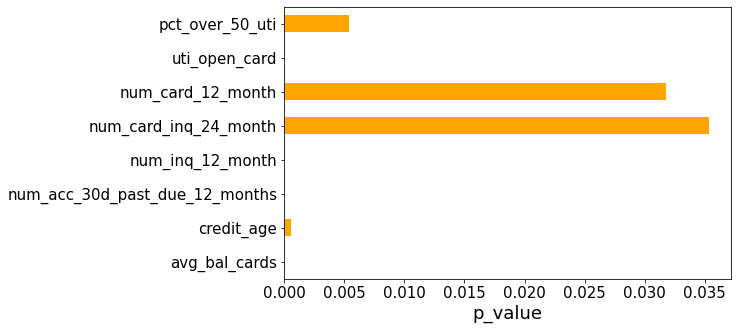

In [284]:
f, axss = plt.subplots(1, 1, figsize = [8, 5])
lr_feature['p_value'].plot.barh(color='orange')
plt.xlabel('p_value', fontsize=18)
plt.tick_params(axis='both', labelsize=15)
plt.show()

#### 5.3.3 RandomForestClassifier optimization

In [161]:
parameters = {'n_estimators':[10,50,100,500], 
              'max_depth':[1,3,6,9,12]}
RF = RandomForestClassifier(random_state=0)
GRID_RF = grid_search_wrapper(RF, parameters, refit_score='f1_score')                                                                                

Best params for f1_score
{'max_depth': 12, 'n_estimators': 500}

Confusion matrix optimized for f1_score on the test data:
        pred_0  pred_1
true_0    3825     675
true_1     172     328
roc_auc_score is:  0.8448524444444445
f1_score is:  0.4364604125083167
Accuracy:  0.8306
recall =  0.656
precision =  0.3270189431704885


In [71]:
best_RF_model_f1 = GRID_RF.best_estimator_

In [96]:
# predict class labels for the test set
predictedBest_f1 = best_RF_model_f1.predict(X_test)

# generate class probabilities
probsBest_f1 = best_RF_model_f1.predict_proba(X_test)

In [162]:
# feature importance
importances = best_RF_model_f1.feature_importances_
rf_importance = pd.DataFrame(importances, index = X_train.columns, columns=['importance']).sort_values('importance', ascending=False)
rf_importance

,importance
avg_bal_cards,0.159555
uti_open_card,0.109185
num_acc_30d_past_due_12_months,0.098669
pct_card_over_50_uti,0.075317
num_inq_12_month,0.070521
num_card_inq_24_month,0.066593
tot_amount_currently_past_due,0.058281
pct_over_50_uti,0.056941
uti_max_credit_line,0.048190
tot_balance,0.045499


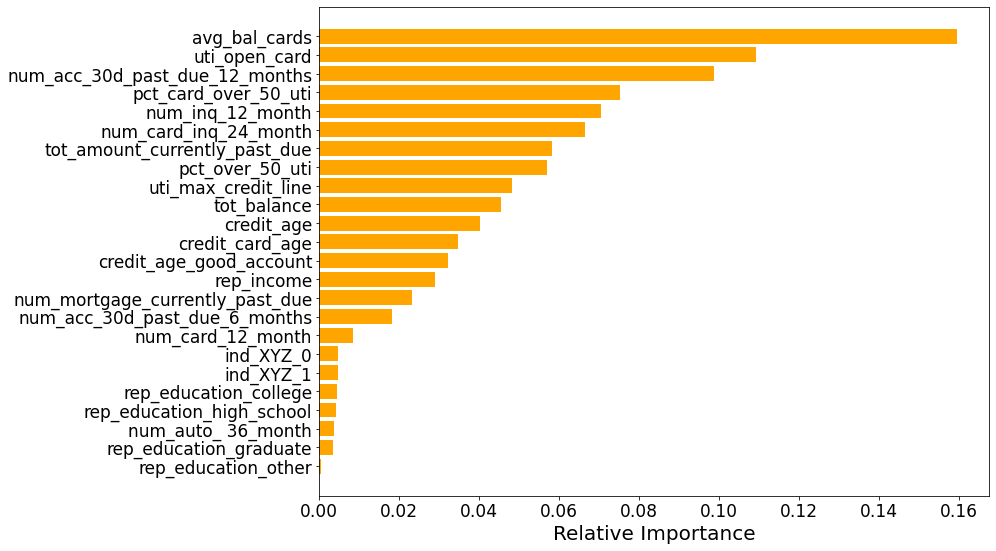

In [114]:
f, axss = plt.subplots(1, 1, figsize = [12, 9])
indices = np.argsort(importances)
plt.barh(range(len(indices)), importances[indices], color='orange')
plt.yticks(range(len(indices)), [X_train.columns[i] for i in indices])
plt.xlabel('Relative Importance', fontsize=20)
plt.tick_params(axis='both', labelsize=17)
plt.show()

#### 5.3.4 GradientBoostingClassifier 

In [ ]:
# parameters = {
#     'n_estimators': [50, 100],
#     'max_depth': [4, 6],
#     'min_samples_split': [2, 4, 6],
#     'learning_rate': [0.005, 0.01]}
# GB = GradientBoostingClassifier(random_state=0)
# GRID_GB = grid_search_wrapper(GB, parameters, refit_score='f1_score')                                                  

## 6. Fraud Characteristics

In [74]:
# avg_bal_cards: mean
train_data.groupby(['Def_ind'])[['avg_bal_cards']].mean()

,avg_bal_cards
Def_ind,
0,12346.130574
1,11192.178133


In [75]:
# avg_bal_cards: median
train_data.groupby(['Def_ind'])[['avg_bal_cards']].median()

,avg_bal_cards
Def_ind,
0,12342.906155
1,10555.715845


In [88]:
# uti_open_card: mean
train_data.groupby(['Def_ind'])[['uti_open_card']].mean()

,uti_open_card
Def_ind,
0,0.481886
1,0.571702


In [91]:
# uti_open_card: median
train_data.groupby(['Def_ind'])[['uti_open_card']].median()

,uti_open_card
Def_ind,
0,0.482628
1,0.568269


In [92]:
# num_acc_30d_past_due_12_months: mean
train_data.groupby(['Def_ind'])[['num_acc_30d_past_due_12_months']].mean()

,num_acc_30d_past_due_12_months
Def_ind,
0,0.112611
1,0.552000


## 7. How to use the prediction

In [98]:
t = (10 * probsBest_f1[:, 1]).astype(int)
unique, counts = np.unique(t, return_counts=True)

print(np.asarray((unique, counts)).T)

[[   0  843]
 [   1 1003]
 [   2  864]
 [   3  735]
 [   4  552]
 [   5  400]
 [   6  278]
 [   7  202]
 [   8   93]
 [   9   30]]


Application Rcommended:
- green: 1 - 3 pass
- grey: 4-7 need manual investigation
- red: 8,9 decline